In [1]:
from UTILITY_quickstart import *

with open('setLattice_defaults.yml', 'r') as file:
    importedDefaultSettings = yaml.safe_load(file)

In [2]:
csrTF = False

inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_defaults.yml
Number of macro particles = 10000.0


[-0.002, -0.0015]
New particle count: 5324
5324
[-0.0011, -0.001]
New particle count: 4725
4725


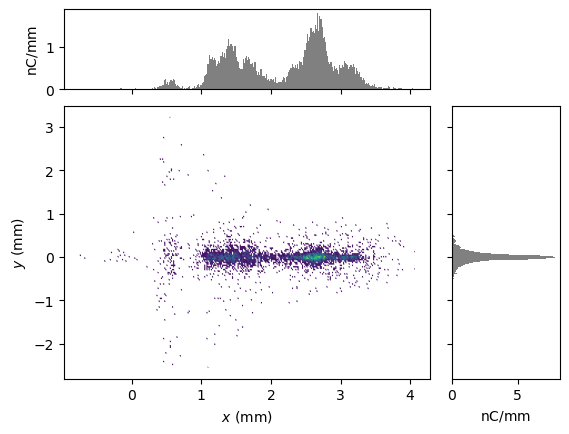

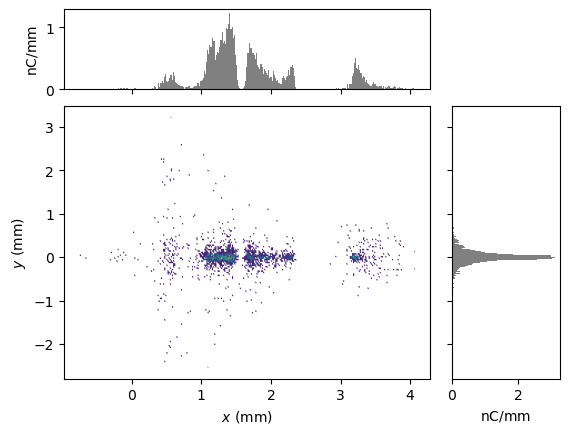

<Figure size 640x480 with 0 Axes>

In [3]:
comparisonElement = "CB2LE" #This is in a dispersive region, downstream of the BC20 collimators

trackBeam(tao, centerBC14=True, centerBC20=True)
P_baseline_comparison = getBeamAtElement(tao, comparisonElement)

trackBeam(tao, centerBC14=True, centerBC20=True, allCollimatorRules = [[-0.002, -0.0015], [-0.0011, -0.001]] )
P_mod_comparison = getBeamAtElement(tao, comparisonElement)

display(plotMod(P_baseline_comparison, 'x', 'y',  bins=300))
display(plotMod(P_mod_comparison, 'x', 'y',  bins=300))
plt.clf()

# Notch scan

Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = end
Tracking!
trackBeam() exiting
-0.003
[-0.0035, -0.0025]
New particle count: 10000
10000


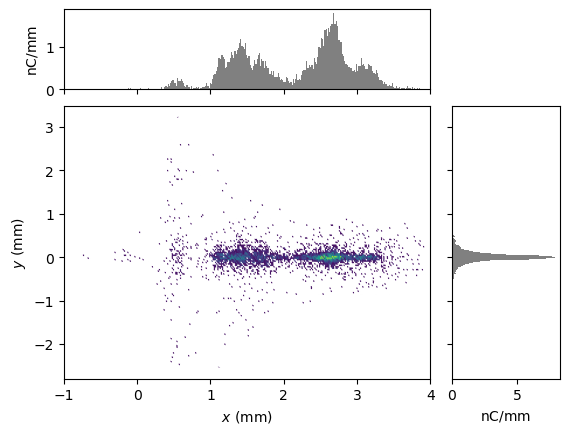

-0.0025
[-0.003, -0.002]
New particle count: 9391
9391


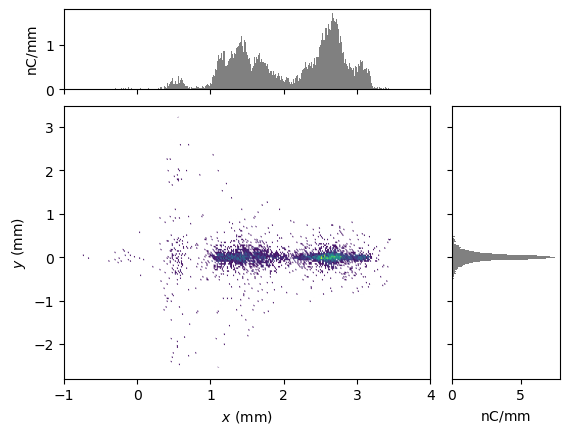

-0.002
[-0.0025, -0.0015]
New particle count: 4721
4721


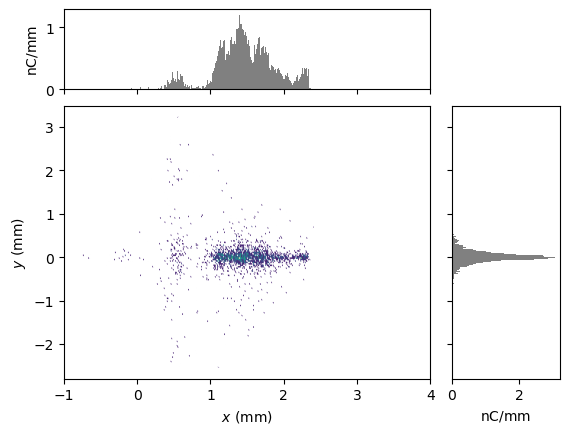

-0.0015
[-0.002, -0.001]
New particle count: 3293
3293


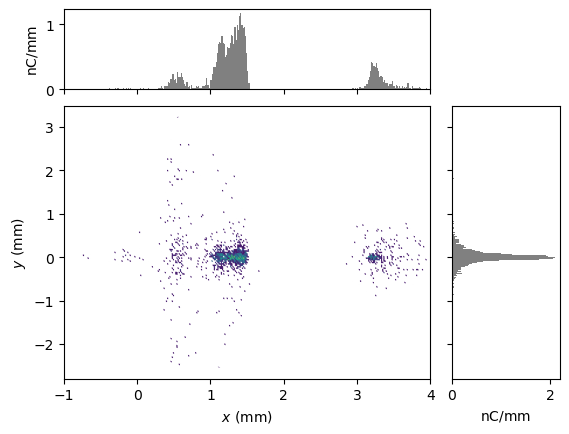

-0.001
[-0.0015, -0.0005]
New particle count: 5598
5598


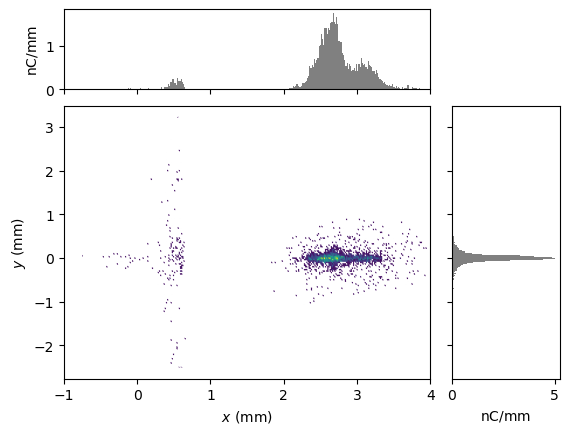

-0.0005
[-0.001, 0.0]
New particle count: 7328
7328


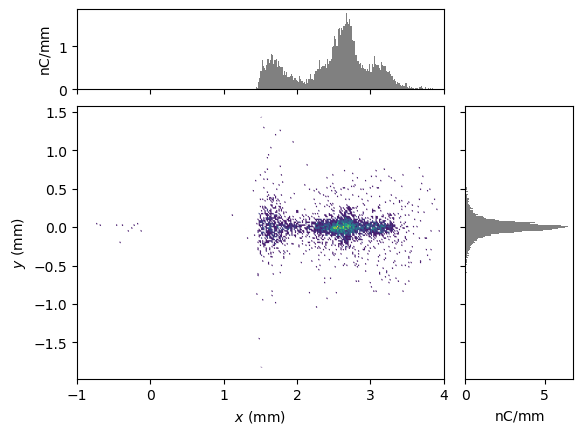

0.0
[-0.0005, 0.0005]
New particle count: 9682
9682


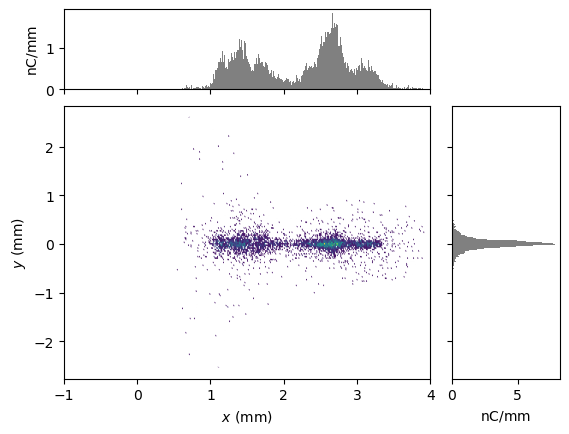

0.0005
[0.0, 0.001]
New particle count: 9985
9985


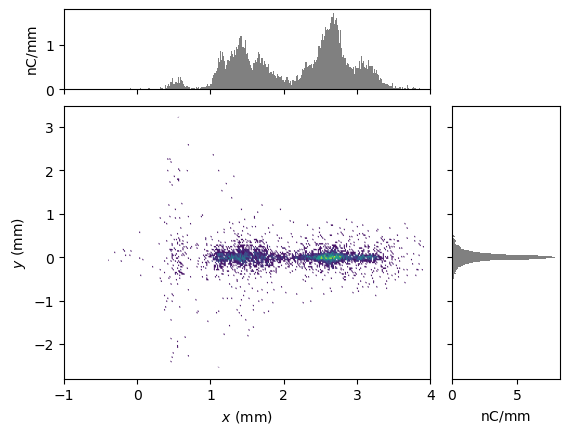

0.001
[0.0005, 0.0015]
New particle count: 10000
10000


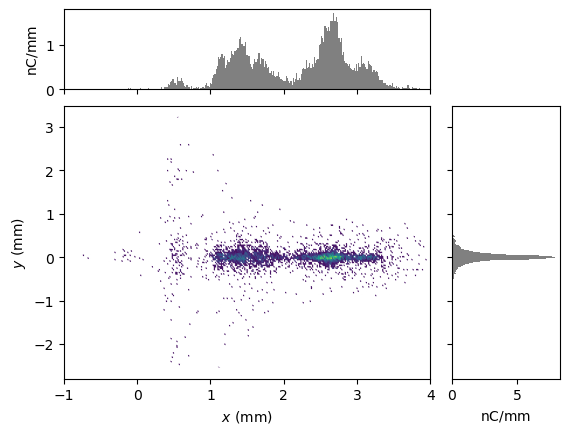

0.0015
[0.001, 0.002]
New particle count: 10000
10000


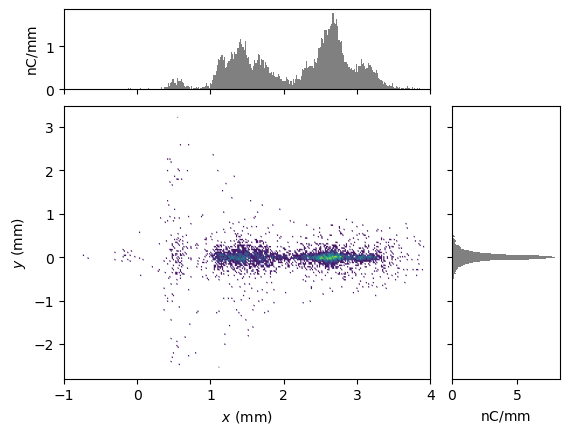

0.002
[0.0015, 0.0025]
New particle count: 10000
10000


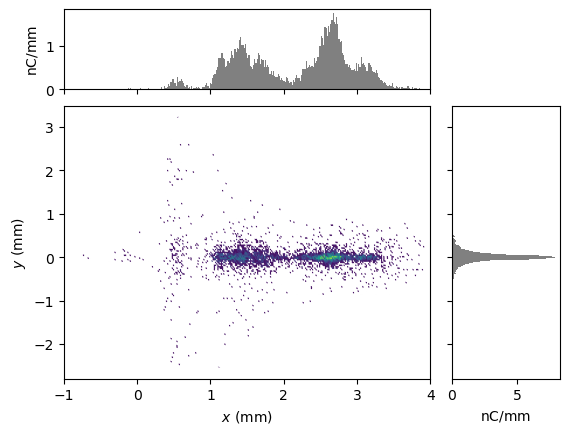

0.0025
[0.002, 0.003]
New particle count: 10000
10000


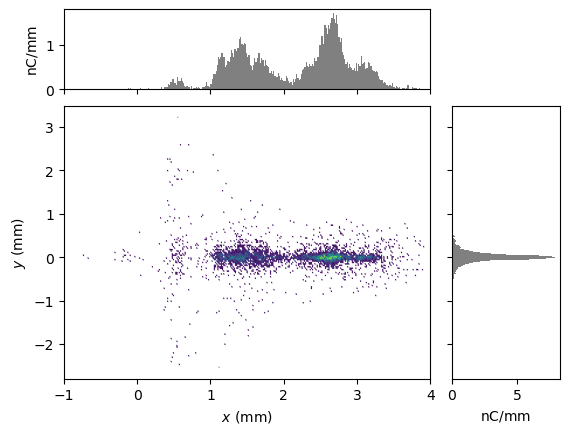

In [4]:
trackBeam(tao, verbose = True, centerBC14=True, centerBC20=True)

trackStart = "BEGBC20"
P_trackStart = getBeamAtElement(tao, trackStart)
makeBeamActiveBeamFile(P_trackStart)
tao.cmd('reinit beam')

notchWidth = 0.001

for notchPosition in np.arange(-0.003, 0.003, 0.0005):
    print(notchPosition)

    trackBeam(tao, trackStart = trackStart, allCollimatorRules = [[notchPosition - notchWidth/2, notchPosition + notchWidth/2]])
    
    P_comparison = getBeamAtElement(tao, comparisonElement)
    
    display(plotMod(P_comparison, 'x', 'y',  bins=300, xlim = (-0.001, 0.004))) 

plt.clf()